In [1]:
import time
import math
import hdbscan
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from classix import CLASSIX, loadData
from quickshift.QuickshiftPP import * # download from https://github.com/google/quickshift

In [2]:
data = loadData('vdu_signals') # load the data
print(data.shape) # (2028780, 2)

(2028780, 2)


In [3]:
np.random.seed(0)
sample = np.random.choice(data.shape[0], size=int(np.round(0.05*data.shape[0])))
X = data[sample]
print(X.shape)

(101439, 2)


In [4]:
sample_size = 10 # each algorithm's running repeats for 10 times
timing = []

Average consume time:  12.697456979751587


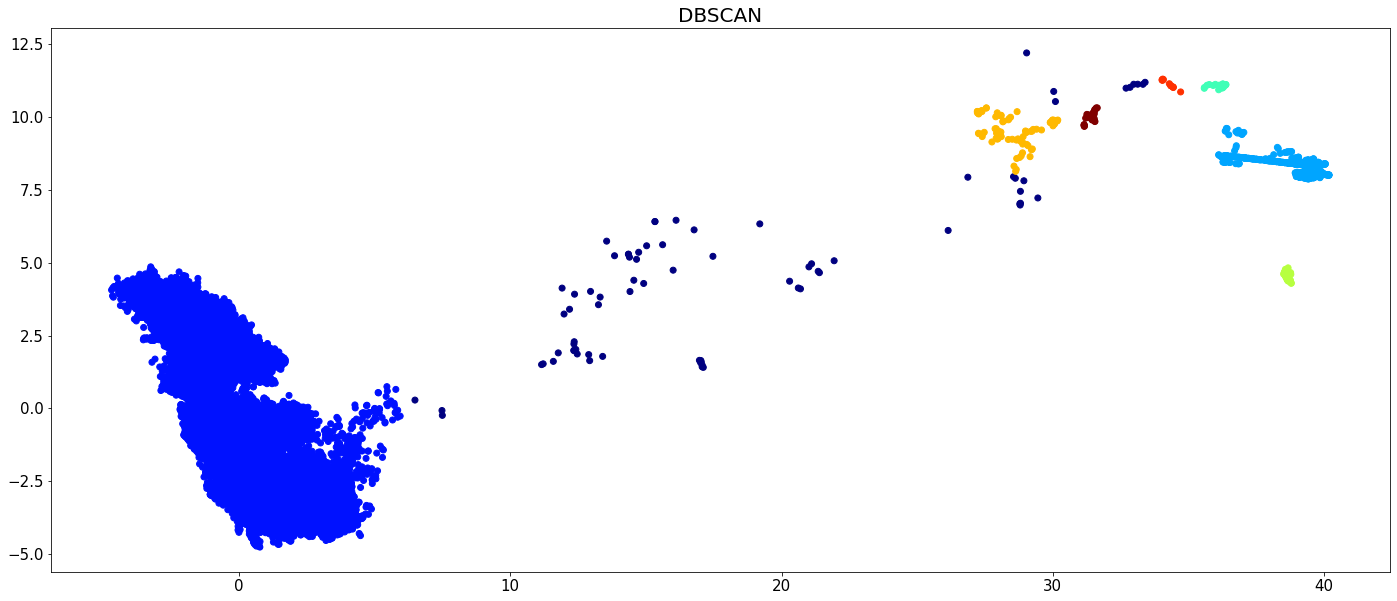

In [5]:
sum_time = 0
for i in range(sample_size):
    st = time.time()
    dbscan = DBSCAN(eps=0.6, min_samples=12)
    dbscan.fit(X)
    et = time.time()
    sum_time = sum_time + et - st

timing.append(sum_time/sample_size)
print("Average consume time: ", sum_time/sample_size)
plt.figure(figsize=(24,10))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='jet')
plt.tick_params(axis='both',  labelsize=15)
plt.title('DBSCAN',  fontsize=20)
plt.savefig('DBSCAN.png', bbox_inches='tight')
plt.show()


Average consume time:  9.302956771850585


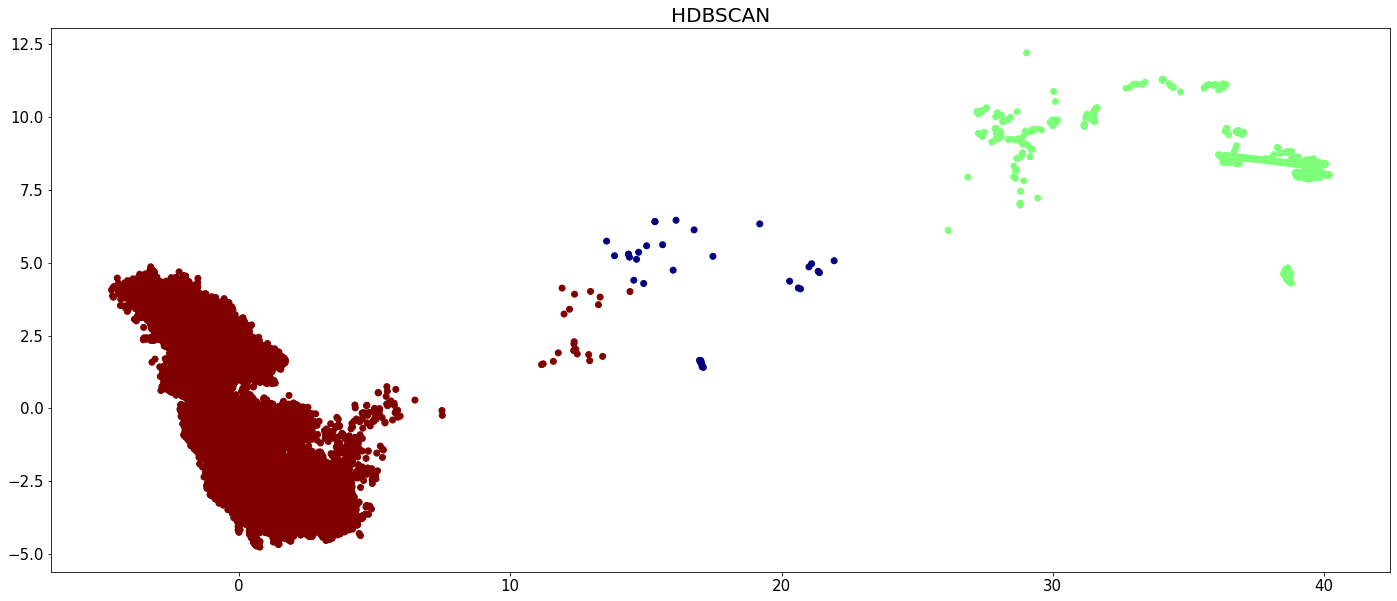

In [6]:
sum_time = 0
for i in range(sample_size):
    st = time.time()
    _hdbscan = hdbscan.HDBSCAN(min_cluster_size=420, core_dist_n_jobs=1)
    hdbscan_labels = _hdbscan.fit_predict(X)
    et = time.time()
    sum_time = sum_time + et - st

timing.append(sum_time/sample_size)
print("Average consume time: ", sum_time/sample_size)
plt.figure(figsize=(24,10))
plt.scatter(X[:,0], X[:,1], c=hdbscan_labels, cmap='jet')
plt.tick_params(axis='both',  labelsize=15)
plt.title('HDBSCAN',  fontsize=20)
plt.savefig('HDBSCAN.png', bbox_inches='tight')
plt.show()

Average consume time:  70.0554811000824


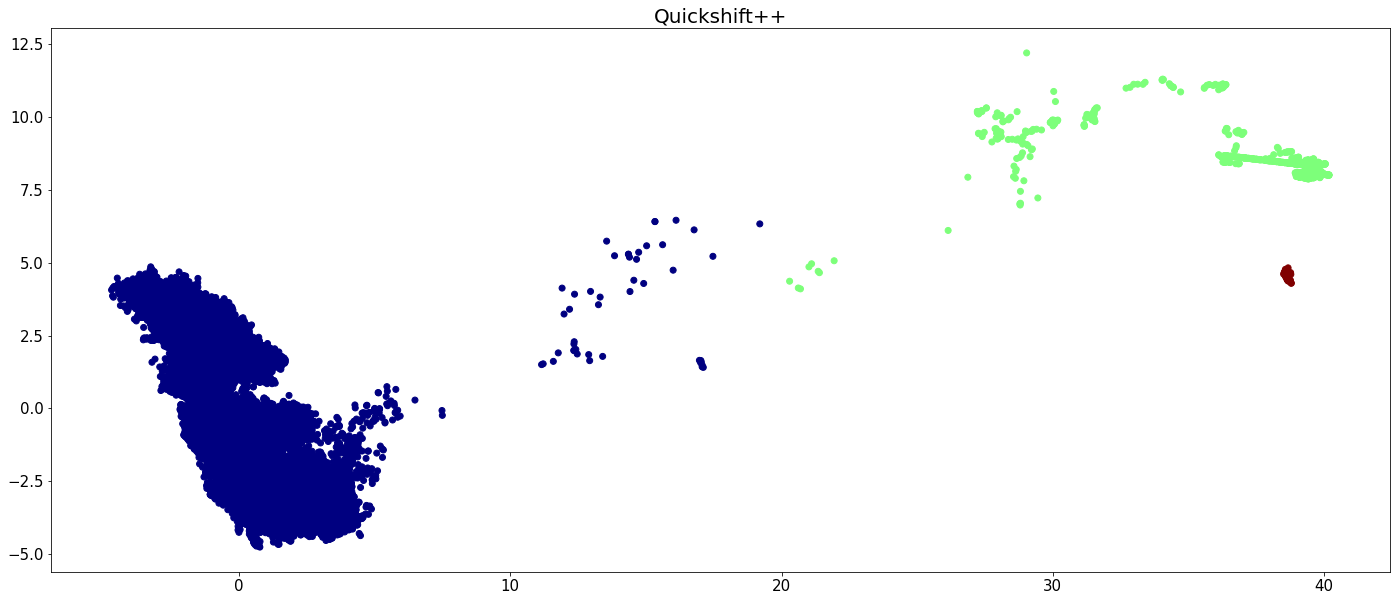

In [7]:
sum_time = 0
for i in range(sample_size):
    st = time.time()
    quicks = QuickshiftPP(k=450, beta=0.85)
    quicks.fit(X.copy(order='C'))
    quicks_labels = quicks.memberships
    et = time.time()
    sum_time = sum_time + et - st
    
timing.append(sum_time/sample_size)
print("Average consume time: ", sum_time/sample_size)
plt.figure(figsize=(24,10))
plt.scatter(X[:,0], X[:,1], c=quicks_labels, cmap='jet')
plt.tick_params(axis='both',  labelsize=15)
plt.title('Quickshift++',  fontsize=20)
plt.savefig('Quickshiftpp.png', bbox_inches='tight')
plt.show()

Average consume time:  1.209138560295105


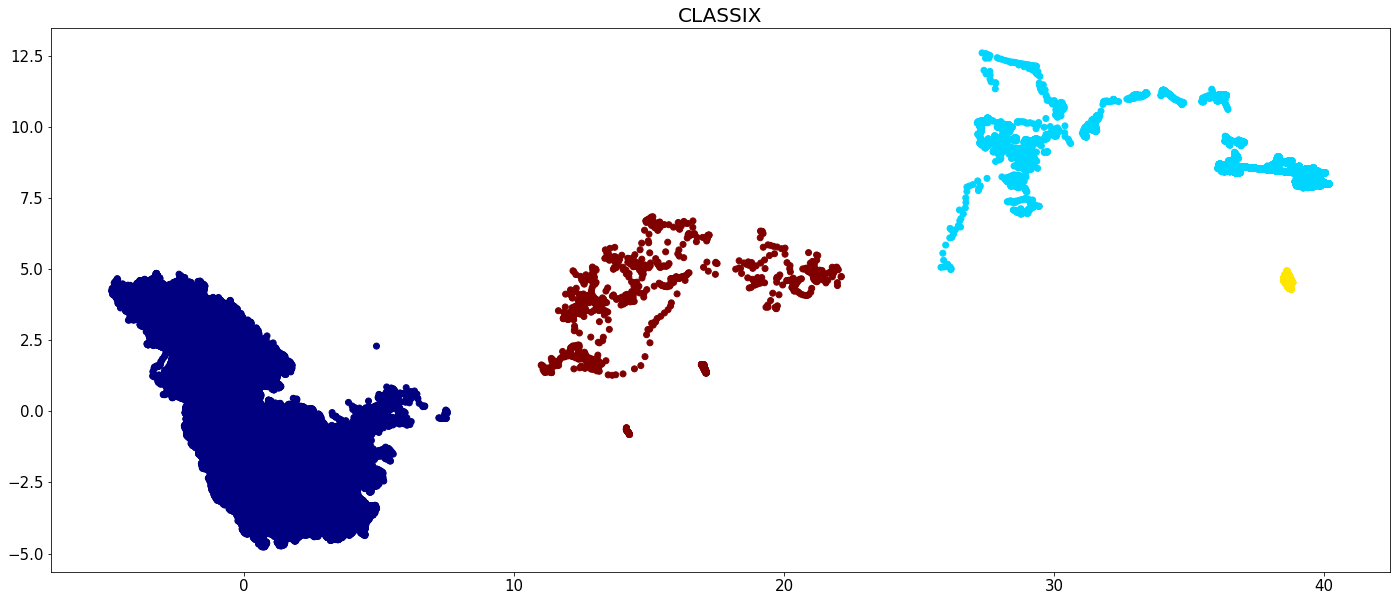

In [8]:
sum_time = 0
for i in range(sample_size):
    st = time.time()
    clx = CLASSIX(sorting='pca', radius=1, verbose=0, group_merging='distance')
    clx.fit_transform(data)
    et = time.time()
    sum_time = sum_time + et - st

timing.append(sum_time/sample_size)
print("Average consume time: ", sum_time/sample_size)
plt.figure(figsize=(24,10))
plt.scatter(data[:,0], data[:,1], c=clx.labels_, cmap='jet')
plt.tick_params(axis='both',  labelsize=15)
plt.title('CLASSIX',  fontsize=20)
plt.savefig('CLASSIX.png', bbox_inches='tight')
plt.show()

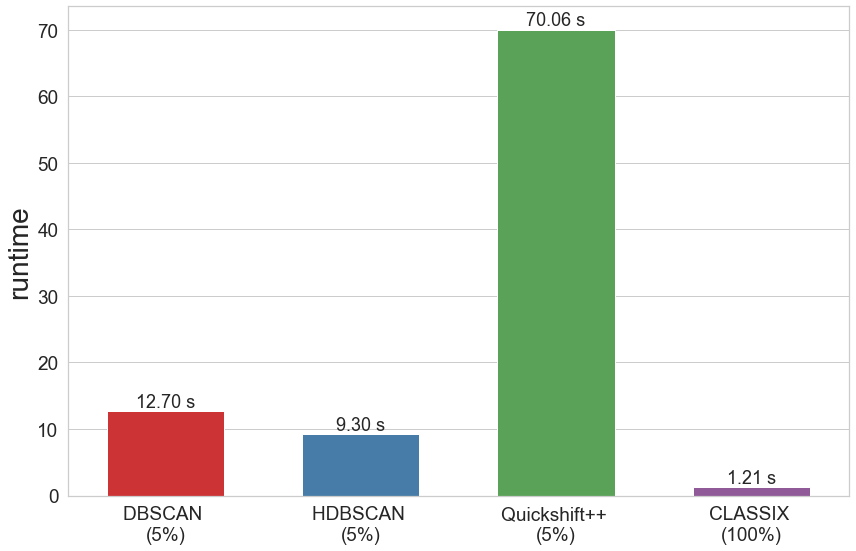

In [9]:
bardf = pd.DataFrame()
names = ['DBSCAN \n(5%)', 'HDBSCAN \n(5%)', 'Quickshift++ \n(5%)', 'CLASSIX \n(100%)']
bardf['clustering'] = names
bardf['runtime'] = timing

def colors_from_values(values, palettes):
    norm = (values - min(values)) / (max(values) - min(values))
    indices = np.round(norm * (len(values) - 1)).astype(np.int32)
    palettes = sns.color_palette(palettes, len(values))
    return np.array(palettes).take(indices, axis=0)


pvals = np.array([0.1,0.2,0.4,0.6]) # np.array(timing)/np.sum(timing)
plt.figure(figsize=(14, 9))
sns.set(font_scale=1.5, style="whitegrid")
ax = sns.barplot(x="clustering", y="runtime", data=bardf, width=0.6, 
                 palette=colors_from_values(pvals, 'Set1'))

ax.bar_label(ax.containers[0], fmt='%.2f s')
ax.set(xlabel=None)
ax.set_ylabel("runtime", fontsize=28)
plt.tick_params(axis='both', labelsize=19)
plt.savefig('results/runtime.png', bbox_inches='tight')
plt.show()